# Confidence

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
# df_h = pd.read_csv("../data_text/Hybrid_final_vs_splits/stages/H3_for_PUBLICATION_no_conflicts.csv")
df_h = pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Inappropriateness_sensitive_topics_2.0/appropriateness/Appropriateness.csv")

In [25]:
len(df_h)

163332

In [26]:
len(df_h[df_h['human_labeled']==1]),len(df_h[df_h['human_labeled']==0])

(8822, 154510)

In [24]:
df_h_cut = df_h[(df_h['inappropriate']>0.8)|(df_h['inappropriate']<0.2)]
len(df_h_cut), len(df_h_cut)*0.85

(74376, 63219.6)

In [6]:
df_h.head()

,text,inappropriate,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,...,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
0,Начальники ДК и нынешнего места работы?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.09
1,"Читаю. Драки, грабежи, ДТП. Изредка убийства, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.18
2,"Допустимо, если информация не нарушает правил ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.02
3,В больницу при приеме на работу тоже мед комис...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
4,а зачем ты на проураинские митинги выходил? во...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.40


In [27]:
unsfae = list(df_h['inappropriate'])

In [28]:
unsfae_adj = [el if el >=0.5 else 1 - el for el in unsfae]

In [29]:
np.mean(unsfae_adj)

0.9320158327823085

In [10]:
np.median(unsfae_adj)

1.0

# Crowdosurce

In [2]:
df_cr = pd.read_csv("../data_text/Multi_crowdsource_all.csv")


In [16]:
df_cr.head()

,text,"Преступления (убийство, насилие, похищения, махинации), тюремная жизнь, судебные процессы","Преступления в интернете (взломы, обход блокировок,вирусы,пиратский контент, персональные данные, торренты)",Наркотики/табак/алкоголь,Азартные игры,Эротика/порнография/подробности половых актов/извращения,Проституция,"Рабство, торговля людьми/органами",Призывы к самоубийству/обсуждение способов самоубийства,Терроризм (призывы и подготовка к террактам/войнам),Оружие,Внешность/одежда человека,"Болезни, инвалидность, психические заболевания",Политика/исторические и современные конфликты/военная служба,"Расизм, национализм",Религия,"ЛГБТ (лесбиянки, гомосексуалисты, бисексуалы, траснегендеры)",Стереотипы о мужчинах/женщинах,"Социальное неравенство (деньги, образование, место жительства итд)"
0,"Нееет, родаки обязаны родив личинку дать ей об...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0,1.0,1.0,1.0
1,баба в мусульманских странах она не имеет прав...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,1.0,1.0
2,"Группа в основном толстая, хотя фотки настоящи...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,0.0,1.0,1.0
3,Учи японский и едь в Японию там у них характер...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.79,0.0,0.0,1.0,1.0
4,но ведь в сборнике анекдотов конституции рахи ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,1.0,1.0


In [17]:
columns_nec = list(df_cr.columns)[1:]

In [18]:
collected_condifences_raw = []
for c in columns_nec:
    curr_conf = list(df_cr[c])
    collected_condifences_raw.extend(curr_conf)

In [19]:
collected_condifences_adj = [el if el >=0.5 else 1 - el for el in collected_condifences_raw]

In [20]:
np.mean(collected_condifences_adj)

0.996626333724373

In [21]:
np.median(collected_condifences_adj)

1.0

# Topic counter

In [37]:
topics_list = list(df_h.columns)[2:-2]
topics_list

['offline_crime',
 'online_crime',
 'drugs',
 'gambling',
 'pornography',
 'prostitution',
 'slavery',
 'suicide',
 'terrorism',
 'weapons',
 'body_shaming',
 'health_shaming',
 'politics',
 'racism',
 'religion',
 'sexual_minorities',
 'sexism',
 'social_injustice']

In [33]:
def round_up(val):
    if float(val) > 0.5:
        return 1
    return 0

In [44]:
def get_topic_count(dataframe):
    df_count = pd.DataFrame()
    for c in topics_list:
        if c != 'text':
            df_count[c] = dataframe[c].apply(round_up)
            
    counts = []
    names = []
    for col in df_count.columns:
        cnt = sum(df_count[col])
        counts.append(cnt)
        names.append(col)
        
    df_count_fin = pd.DataFrame({'topic':names, 'count':counts})
    df_count_fin_sorted = df_count_fin.sort_values('topic', ascending = False)
    df_count_fin_sorted.reset_index(drop=True,inplace = True)
    return df_count_fin_sorted
df_h_count = get_topic_count(df_h)
df_h_count.head(100)

,topic,count
0,weapons,7951
1,terrorism,7301
2,suicide,6425
3,social_injustice,7494
4,slavery,6700
5,sexual_minorities,7994
6,sexism,8137
7,religion,8142
8,racism,6816
9,prostitution,8249


In [55]:
df_h_pure = df_h[(df_h['inappropriate'] == 1)|(df_h['inappropriate'] == 0)]
print(len(df_h_pure))
df_h_pure_count = get_topic_count(df_h_pure)
df_h_pure_count.head(100)

106072


,topic,count
0,weapons,4327
1,terrorism,3394
2,suicide,3330
3,social_injustice,5599
4,slavery,3793
5,sexual_minorities,3985
6,sexism,4883
7,religion,4478
8,racism,4173
9,prostitution,4924


In [47]:
df_multi = pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Inappropriateness_sensitive_topics_2.0/sensitive_topics/sensitive_topics.csv")

In [48]:
df_multi_count = get_topic_count(df_multi)
df_multi_count.head(100)

,topic,count
0,weapons,2222
1,terrorism,1303
2,suicide,1407
3,social_injustice,1875
4,slavery,1054
5,sexual_minorities,1967
6,sexism,1592
7,religion,4072
8,racism,1572
9,prostitution,1291


In [54]:
count_statistics = pd.concat([df_multi_count,df_h_count['count'], df_h_pure_count['count']], axis = 1)
count_statistics.head(100)

,topic,count,count,count
0,weapons,2222,7951,4327
1,terrorism,1303,7301,3394
2,suicide,1407,6425,3330
3,social_injustice,1875,7494,5599
4,slavery,1054,6700,3793
5,sexual_minorities,1967,7994,3985
6,sexism,1592,8137,4883
7,religion,4072,8142,4478
8,racism,1572,6816,4173
9,prostitution,1291,8249,4924


# f SCORE DYNAMIC

In [4]:
fscore = [0.8,
0.81,
0.83,
0.84,
0.85,
0.88]

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

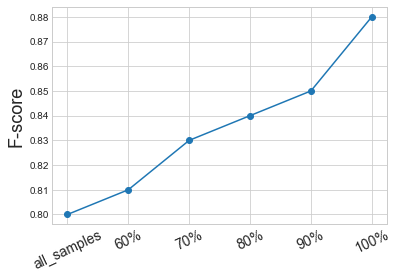

In [71]:
# fig = plt.figure()
# ax = plt.axes()
plt.ylabel('F-score', fontsize=18)
plt.xticks(rotation = 25, fontsize=14)

x = ['all_samples','60%','70%','80%','90%','100%']
plt.plot(x, fscore,marker="o");

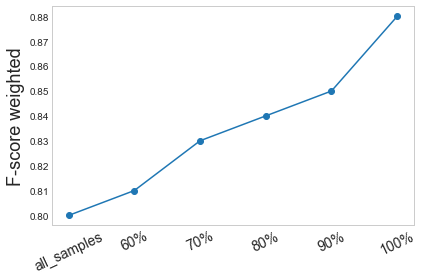

In [9]:
x = ['all_samples','60%','70%','80%','90%','100%']

plt.plot(x, fscore,marker="o")
plt.ylabel('F-score weighted', fontsize=18)
plt.xticks(rotation = 25, fontsize=14)

plt.tight_layout()

plt.grid(alpha = 0)
plt.show()
# plt.savefig("fscore_dynamic.pdf",format='pdf', bbox_inches='tight')

In [5]:
fscore = np.array(fscore)
error_fscore = [0.015,0.015,0.012,0.011,0.01,0.01]
error_fscore = np.array(error_fscore)

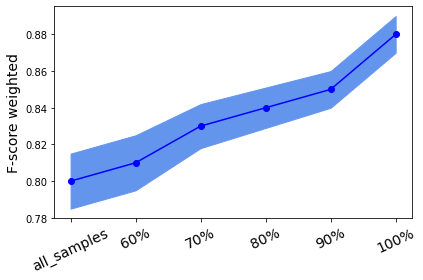

In [6]:
x = ['all_samples','60%','70%','80%','90%','100%']

plt.plot(x, fscore,'b-',marker="o")
plt.ylabel('F-score weighted', fontsize=14)
plt.xticks(rotation = 25, fontsize=14)

plt.fill_between(x, fscore-error_fscore, fscore+error_fscore, color = 'cornflowerblue')

plt.tight_layout()

plt.grid(alpha = 0)
# plt.show()
plt.savefig("fscore_dynamic_shadowed.pdf",format='pdf', bbox_inches='tight')

# Shaded

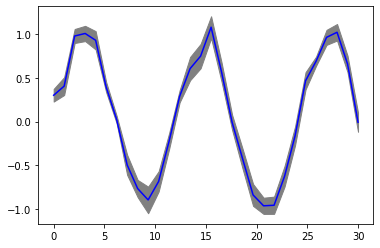

In [35]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape)
y += np.random.normal(0, 0.1, size=y.shape)

plt.plot(x, y, 'b-')
plt.fill_between(x, y-error, y+error, color = 'grey')
plt.show()

In [36]:
y-error

array([ 0.22903106,  0.30454999,  0.90099521,  0.92280024,  0.82668008,
        0.33803776, -0.01994555, -0.61157228, -0.86678369, -1.05144195,
       -0.80315435, -0.31492165,  0.21937913,  0.47399707,  0.61103045,
        0.9569899 ,  0.45522718, -0.09480472, -0.54058273, -0.96698255,
       -1.05931499, -1.05884173, -0.7460329 , -0.2721242 ,  0.36836978,
        0.63905075,  0.87963346,  0.92940118,  0.56629584, -0.11758403])

In [6]:
len(error), x

(30,
 array([ 0.        ,  1.03448276,  2.06896552,  3.10344828,  4.13793103,
         5.17241379,  6.20689655,  7.24137931,  8.27586207,  9.31034483,
        10.34482759, 11.37931034, 12.4137931 , 13.44827586, 14.48275862,
        15.51724138, 16.55172414, 17.5862069 , 18.62068966, 19.65517241,
        20.68965517, 21.72413793, 22.75862069, 23.79310345, 24.82758621,
        25.86206897, 26.89655172, 27.93103448, 28.96551724, 30.        ]))

# Class per sample

In [9]:
df_multi = pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Version2/sensitive_topics/sensitive_topics.csv")

In [10]:
len(df_multi)

33303

In [11]:
df_multi.head()

,text,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"По моему, быдло тот кто осуждает чужие предпоч...",0.0,0.0,0.0,0.0,1.0,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Бабы это вообще безхуйные сиськастые ссущие си...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,изнасиловалиа говорила что девственницаЯ так д...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"и что ? не сосут только уебищные тни, видосов ...",0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
number_topics = []
for i, el in df_multi.iterrows():
    topic_count = 0
    for c in df_multi.columns[1:]:
        if el[c] > 0.5: topic_count += 1
    topic_count = topic_count if topic_count <=3 else '4+'
    number_topics.append(topic_count)

In [13]:
from collections import Counter
Counter(number_topics)

Counter({2: 2315, 3: 817, 1: 26490, '4+': 160, 0: 3521})

In [14]:
lbl_per_cnt = [0, 1, 2, 3, '4+'] 
data = [3521, 26490, 2315, 817, 160] 
data_adj = []
for lpc,cnt in zip(lbl_per_cnt,data):
    print(lpc,cnt)
    adj_curr_list = [lpc] * cnt
    data_adj.extend(adj_curr_list)


0 3521
1 26490
2 2315
3 817
4+ 160


In [15]:
data_pcnt = [round(el/sum(data),2) for el in data]

In [16]:
data_pcnt

[0.11, 0.8, 0.07, 0.02, 0.0]

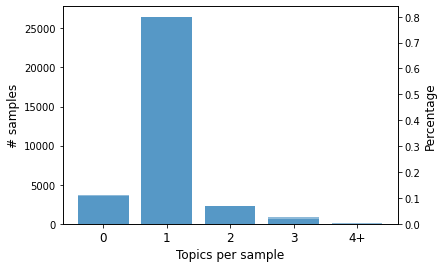

In [20]:
fig, ax = plt.subplots()

objects = lbl_per_cnt
y_pos = np.arange(len(data))
performance = data

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.rc('xtick', labelsize=12)
plt.xlabel('Topics per sample', fontsize=12)
plt.ylabel('# samples', fontsize=12)

ax2 = ax.twinx()
plt.sca(ax2)
plt.bar(y_pos, data_pcnt, align='center', alpha=0.5)

plt.ylabel('Percentage', fontsize=12)
# plt.title('Programming language usage')

fig.savefig("topcis_per_sample.pdf",format='pdf', bbox_inches='tight')

# Words per sentence

In [18]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt 

In [19]:
# df_multi = pd.read_csv("../data_text/crowd_vs_part123self.csv")
df_multi= pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Inappropriateness_sensitive_topics_2.0/sensitive_topics/sensitive_topics.csv")

# df_hybrid = pd.read_csv("../data_text/HYBRID_ST123_CLEANED_FINAL.csv")
df_hybrid = pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Inappropriateness_sensitive_topics_2.0/appropriateness/Appropriateness.csv")


In [22]:
def round_up(val):
    if float(val) > 0.5:
        return 1
    return 0

In [23]:
df_count = pd.DataFrame()
for c in df_multi.columns:
    if c != 'text':
        df_count[c] = df_multi[c].apply(round_up)
    else:
        df_count[c] = df_multi[c]

In [24]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               33303 non-null  object
 1   offline_crime      33303 non-null  int64 
 2   online_crime       33303 non-null  int64 
 3   drugs              33303 non-null  int64 
 4   gambling           33303 non-null  int64 
 5   pornography        33303 non-null  int64 
 6   prostitution       33303 non-null  int64 
 7   slavery            33303 non-null  int64 
 8   suicide            33303 non-null  int64 
 9   terrorism          33303 non-null  int64 
 10  weapons            33303 non-null  int64 
 11  body_shaming       33303 non-null  int64 
 12  health_shaming     33303 non-null  int64 
 13  politics           33303 non-null  int64 
 14  racism             33303 non-null  int64 
 15  religion           33303 non-null  int64 
 16  sexual_minorities  33303 non-null  int64

In [25]:
df_count_hybrid = pd.DataFrame()
for c in df_multi.columns:
    if c != 'text':
        df_count_hybrid[c] = df_hybrid[c].apply(round_up)
    else:
        df_count_hybrid[c] = df_hybrid[c]

In [26]:
topics = list(df_count.columns)[1:19]

In [27]:
topics

['offline_crime',
 'online_crime',
 'drugs',
 'gambling',
 'pornography',
 'prostitution',
 'slavery',
 'suicide',
 'terrorism',
 'weapons',
 'body_shaming',
 'health_shaming',
 'politics',
 'racism',
 'religion',
 'sexual_minorities',
 'sexism',
 'social_injustice']

In [28]:
df_count.head()

,text,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,"По моему, быдло тот кто осуждает чужие предпоч...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Бабы это вообще безхуйные сиськастые ссущие си...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,изнасиловалиа говорила что девственницаЯ так д...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,"и что ? не сосут только уебищные тни, видосов ...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
def get_words_count(text):
    text_adjusted = re.sub('[^а-яА-яa-zA-z ]', ' ', text)
    text_adjusted = re.sub(' +', ' ', text_adjusted)
    return len(text_adjusted.split())
get_words_count(df_count.iloc[0]['text'])

21

In [30]:
def get_words_count_cluster(count):
    if count <= 10:
        return '0-10'
    elif count > 10 and count <= 20:
        return '11-20'
    elif count > 21 and count <= 30:
        return '21-30'
    elif count > 31 and count <= 40:
        return '31-40'
    elif count > 41 and count <= 50:
        return '41-50'
    else:
        return '51+'

df_count['wc'] = df_count['text'].apply(get_words_count)  
df_count['word count clusters'] = df_count['wc'].apply(get_words_count_cluster)

df_count_hybrid['wc'] = df_count_hybrid['text'].apply(get_words_count)  
df_count_hybrid['word count clusters'] = df_count_hybrid['wc'].apply(get_words_count_cluster)

In [31]:
# plot_hyb = df_count['word count clusters'].value_counts().plot(kind='barh', xlabel = 'words per sample', ylabel = 'count')
# fig_hyb = plot_hyb.get_figure()

In [32]:
df_count['word count clusters'].value_counts()

11-20    12324
0-10      8555
21-30     6887
31-40     3459
51+       1710
41-50      368
Name: word count clusters, dtype: int64

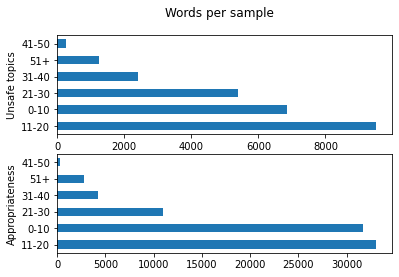

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Words per sample')
df_count['word count clusters'].value_counts().plot(ax=axes[0],kind='barh', xlabel = 'Unsafe topics', ylabel = 'count')
df_count_hybrid['word count clusters'].value_counts().plot(ax=axes[1], kind='barh', xlabel = 'Appropriateness', ylabel = 'count')
fig.savefig("wordcount_hybrid_and_multi.eps",format='eps')

# Average overall

In [33]:
np.mean(list(df_count['wc'])),np.median(list(df_count['wc']))

(18.464432633696664, 17.0)

In [34]:
np.mean(list(df_count_hybrid['wc'])),np.median(list(df_count_hybrid['wc']))

(16.387413366639727, 13.0)

# Average by topic

In [35]:
for c in df_multi.columns:
    if c != 'text':
        df_count_multi_topic = df_count[df_count[c]==1]
        print(c,
              round(np.median(list(df_count_multi_topic['wc'])),2),
                    round(np.mean(list(df_count_multi_topic['wc'])),2))

offline_crime 14.0 16.67
online_crime 17.0 18.26
drugs 17.0 18.68
gambling 19.0 20.6
pornography 13.0 15.5
prostitution 16.0 17.95
slavery 15.0 17.6
suicide 20.0 20.38
terrorism 16.0 18.07
weapons 17.0 17.82
body_shaming 15.0 17.0
health_shaming 17.0 18.7
politics 16.0 17.77
racism 20.0 21.17
religion 20.0 20.4
sexual_minorities 18.0 19.68
sexism 15.0 17.61
social_injustice 16.0 18.47


# Unique words

In [25]:
from tqdm import tqdm

In [39]:
def get_words_set(text):
    text = str(text)
    
    text_adjusted = re.sub('[^а-яА-яa-zA-z ]', ' ', text)
    text_adjusted = re.sub(' +', ' ', text_adjusted)
    text_adjusted = text_adjusted.lower()
    unique_words_set = set(text_adjusted.split())
    return unique_words_set

In [32]:
multi_text = ''.join(list(df_multi['text']))

In [36]:
multi_text[100:304]

'АЙТЕ БЬЮТИФУЛПИПЛ СКОЗАЛИ!!!1По моему, быдло тот кто осуждает чужие предпочтения.А тёлки которые просто ебутся-бляди. Проиграл с двуличного лицемера.Бабы это вообще безхуйные сиськастые ссущие сидя сущест'

In [40]:
multi_set = get_words_set(multi_text)

In [41]:
multi_set

{'гипоалергенную',
 'кремова',
 'хайкика',
 'сохранившимся',
 'лопается',
 'определят',
 'едь',
 'стреляет',
 'шкафу',
 'ебльнику',
 'ценнике',
 'попрошайничество',
 'фанатичных',
 'затычка',
 'медосмотры',
 'разбрасоватбсало',
 'воспитал',
 'личному',
 'лестью',
 'b',
 'властьу',
 'тудавполне',
 'корректор',
 'дозы',
 'компенсация',
 'дыхательной',
 'местнх',
 'каморы',
 'еякуляции',
 'женскую',
 'производственном',
 'плагиатирована',
 'забивая',
 'сварганивший',
 'урвал',
 'упругую',
 'окружи',
 'упование',
 'достиг',
 'пророку',
 'ебалупситеррор',
 'гипотетически',
 'мужски',
 'повстречался',
 'kahr',
 'ригелей',
 'ипц',
 'темная',
 'лудоманииэто',
 'лутшие',
 'ширяев',
 'кретины',
 'кго',
 'обесточатся',
 'нашид',
 'максимумне',
 'пидарашка',
 'мое',
 'грибочки',
 'наркозависимым',
 'дистантных',
 'лахова',
 'ебанутой',
 'вечных',
 'произнесет',
 'бега',
 'кецалькоатль',
 'все',
 'спидозных',
 'большой',
 'наркоманчиками',
 'задежек',
 'получаю',
 'совкопенсионеры',
 'рочить',
 'на

In [42]:
len(multi_set)

76095

In [26]:
# unique_multi_set = set()
# for i, el in tqdm(df_multi.iterrows(), total = len(df_multi)):
#     sample_words_set = get_words_set(el['text'])
#     unique_multi_set = unique_multi_set.union(sample_words_set)

100%|███████████████████████████████████████████████████████████████████████████| 25679/25679 [01:49<00:00, 233.53it/s]


In [28]:
len(unique_multi_set)

81085

In [44]:
hybrid_text = ''.join(list(df_hybrid['text']))
hybrid_set = get_words_set(hybrid_text)
len(hybrid_set)

155674